In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob, os

In [3]:
# Get list of tiff training images path, excluding the mask files
ultrasounds = [img for img in glob.glob("./train/*.tif") if 'mask' not in img]

In [4]:
len(ultrasounds)

3410

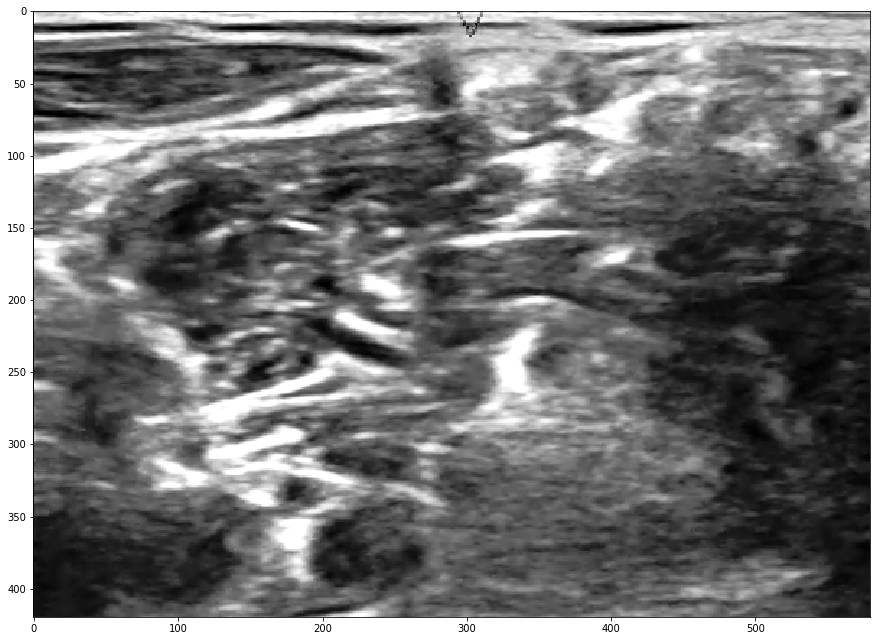

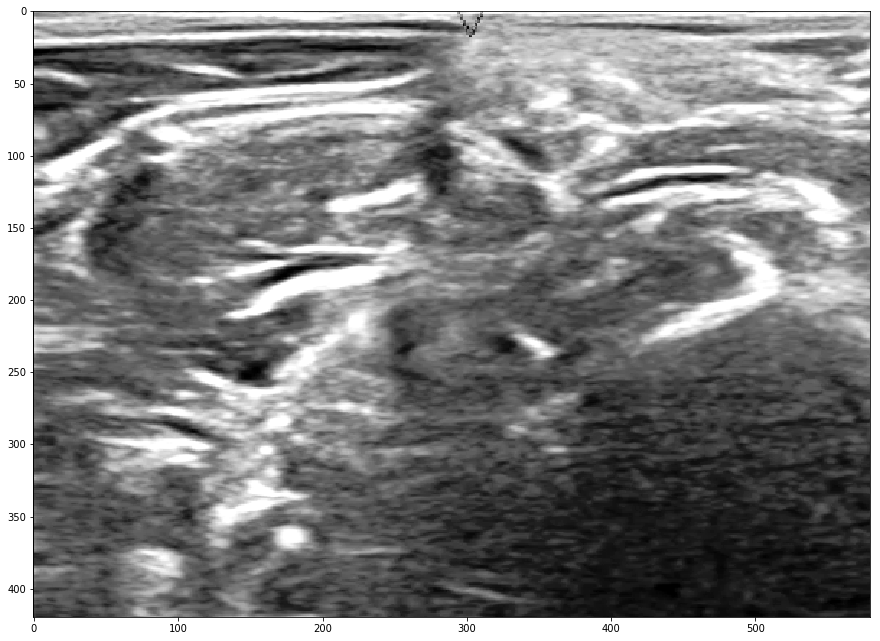

In [7]:
# Grey Scale
for file in ultrasounds[0:2]:
    im = plt.imread(file)
    plt.figure(figsize=(15,20))
    plt.imshow(im, cmap="Greys_r")
    plt.show()

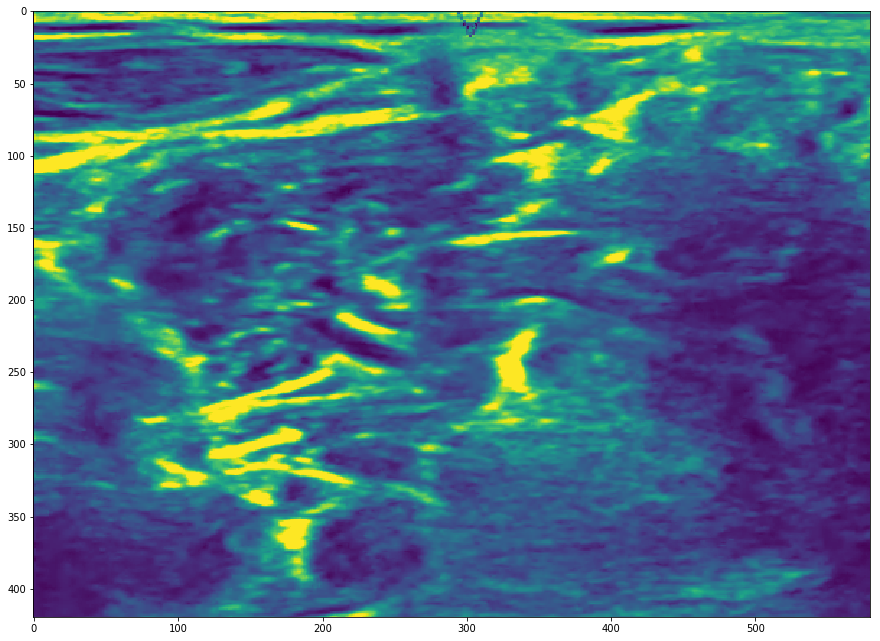

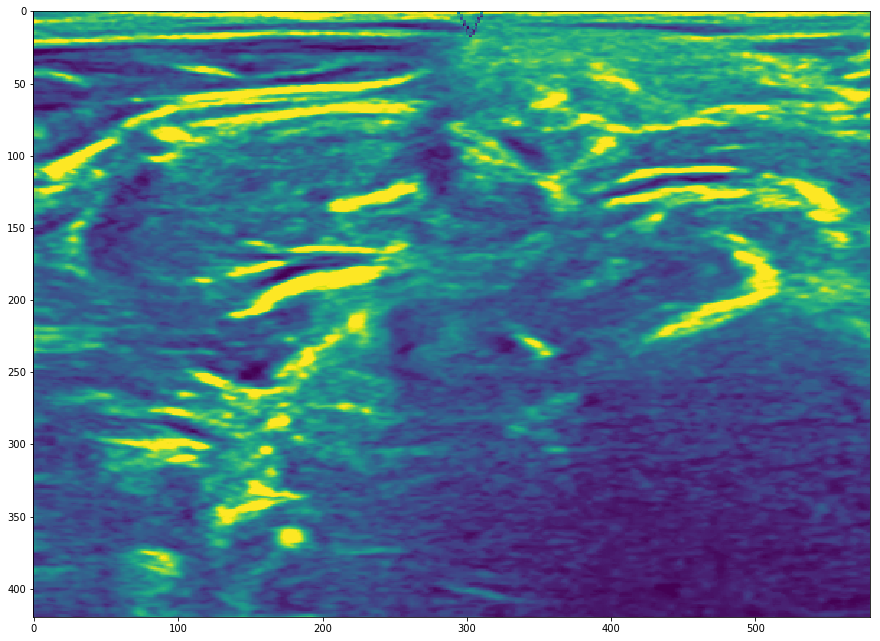

In [6]:
# Color
for file in ultrasounds[0:2]:
    im = plt.imread(file)
    plt.figure(figsize=(15,20))
    plt.imshow(im)
    plt.show()

# Training Images and Mask    

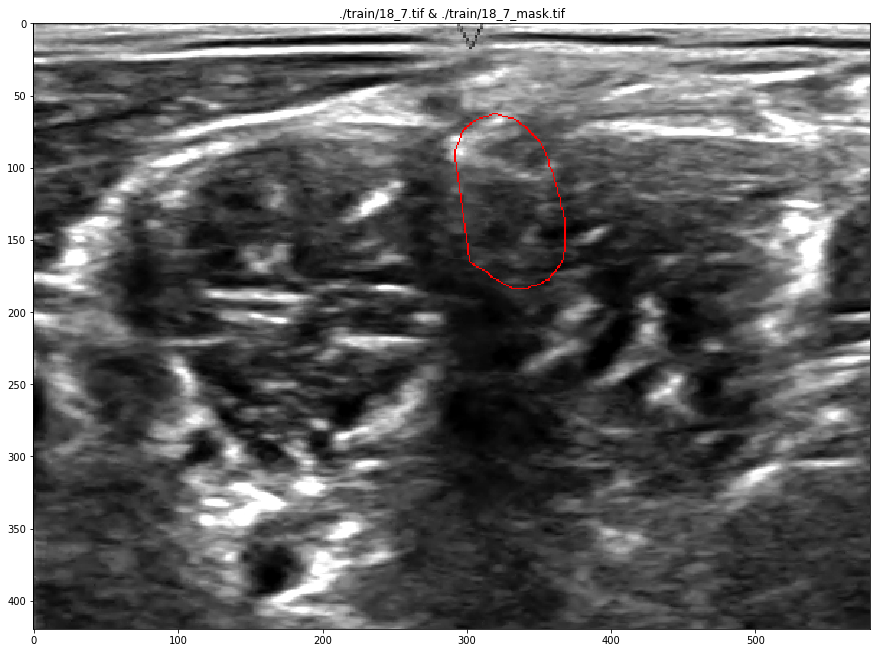

('plotted:', './train/18_7.tif & ./train/18_7_mask.tif')


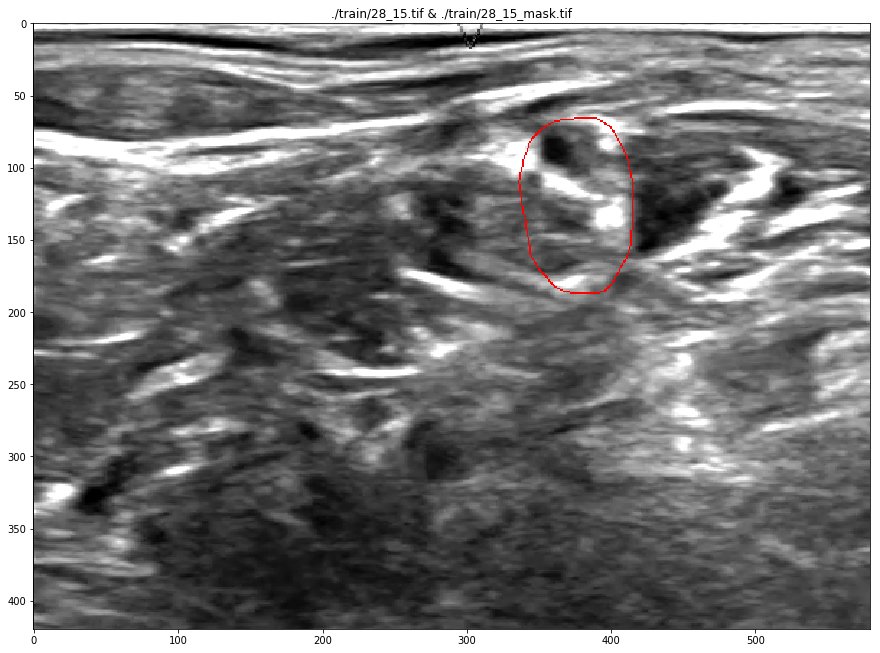

('plotted:', './train/28_15.tif & ./train/28_15_mask.tif')


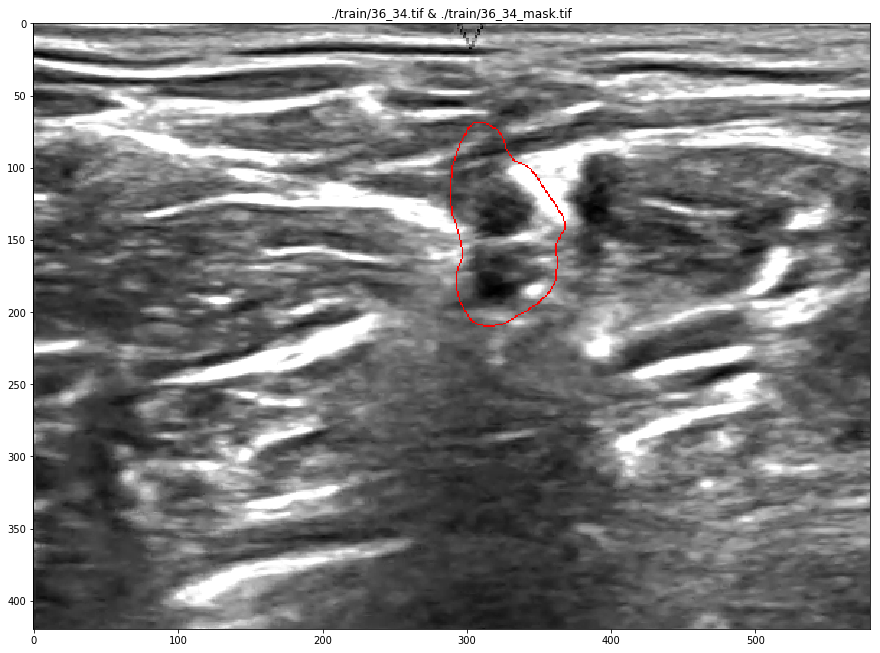

('plotted:', './train/36_34.tif & ./train/36_34_mask.tif')


In [8]:
# This script loops through ultrasound images in the training set that have non-blank masks,
# and then plots each image, adding the edges of their respective masks in red.
# This should outline the BP nerves in the training images. 

# IMAGES_TO_SHOW = 20 
IMAGES_TO_SHOW = 3 

import numpy as np
import matplotlib.pyplot as plt
import glob, os, os.path
import cv2


def image_with_mask(img, mask):
    # returns a copy of the image with edges of the mask added in red
    img_color = grays_to_RGB(img)
    mask_edges = cv2.Canny(mask, 100, 200) > 0  
    img_color[mask_edges, 0] = 255  # set channel 0 to bright red, green & blue channels to 0
    img_color[mask_edges, 1] = 0
    img_color[mask_edges, 2] = 0
    return img_color

def fimg_to_fmask(img_path):
    # convert an image file path into a corresponding mask file path 
    dirname, basename = os.path.split(img_path)
    maskname = basename.replace(".tif", "_mask.tif")
    return os.path.join(dirname, maskname)

def mask_not_blank(mask):
    return sum(mask.flatten()) > 0

def grays_to_RGB(img):
    # turn 2D grayscale image into grayscale RGB
    return np.dstack((img, img, img)) 

def plot_image(img, title=None):
    plt.figure(figsize=(15,20))
    plt.title(title)
    plt.imshow(img)
    plt.show()

if __name__ == "__main__":

    f_ultrasounds = [img for img in glob.glob("./train/*.tif") if 'mask' not in img]
    # f_ultrasounds.sort()  
    f_masks       = [fimg_to_fmask(fimg) for fimg in f_ultrasounds]
    images_shown = 0 

    for f_ultrasound, f_mask in zip(f_ultrasounds, f_masks):

        img  = plt.imread(f_ultrasound)
        mask = plt.imread(f_mask)

        if mask_not_blank(mask):
            # plot_image(grays_to_RGB(img),  title=f_ultrasound)
            # plot_image(grays_to_RGB(mask), title=f_mask)

            f_combined = f_ultrasound + " & " + f_mask 
            plot_image(image_with_mask(img, mask), title=f_combined)
            print('plotted:', f_combined)
            images_shown += 1

        if images_shown >= IMAGES_TO_SHOW:
            break